# Baseball Case Study

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [2]:
# Importing the data and creating the data frame

url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
baseball_df = pd.read_csv(url, sep=',')
baseball_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# Statstical Analysis of the data frame

baseball_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [4]:
# Calcuating null values in the data, outcome shows there are no null values in the data

baseball_df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
# Shape of the data frame, 30 shows number of rows and 17 shows number of columns

baseball_df.shape

(30, 17)

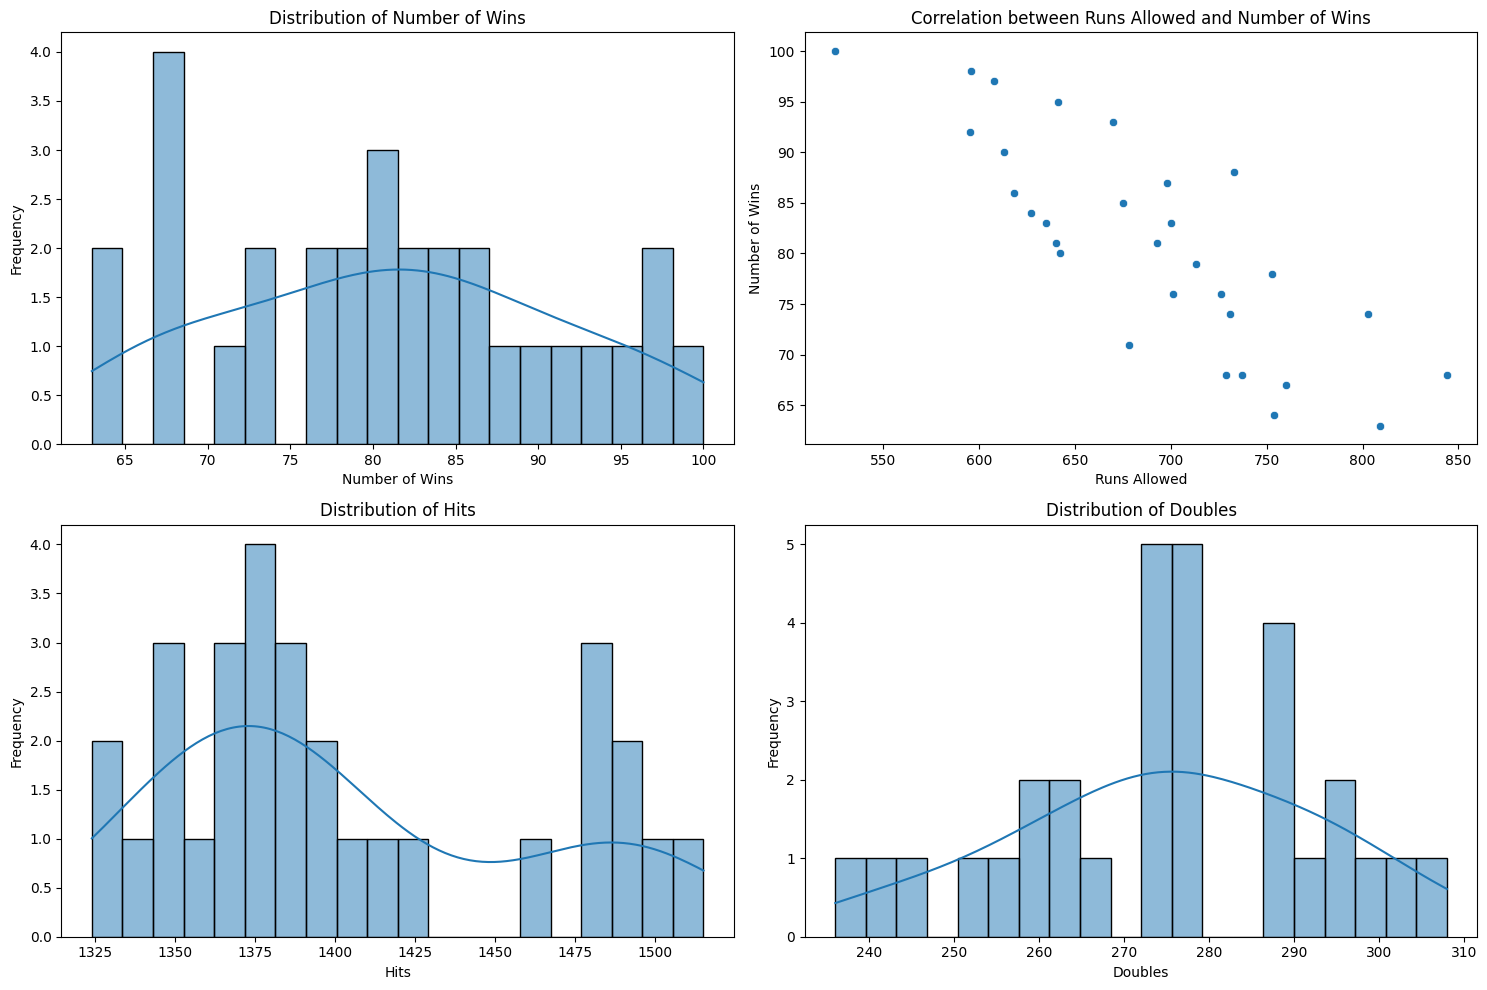

In [6]:
# Data visualisations

# 2x2 grid for subplots

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Visualize the distribution of 'W' (Number of Wins)

sns.histplot(baseball_df['W'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Number of Wins')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Number of Wins')

# Visualize the correlation between 'W' (Number of Wins) and 'RA' (Runs Allowed)

sns.scatterplot(x='RA', y='W', data=baseball_df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Runs Allowed')
axes[0, 1].set_ylabel('Number of Wins')
axes[0, 1].set_title('Correlation between Runs Allowed and Number of Wins')

# Visualize the distribution of 'H' (Hits)

sns.histplot(baseball_df['H'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Hits')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Hits')

# Visualize the distribution of '2B' (Doubles)

sns.histplot(baseball_df['2B'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Doubles')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Doubles')

plt.tight_layout()
plt.show()

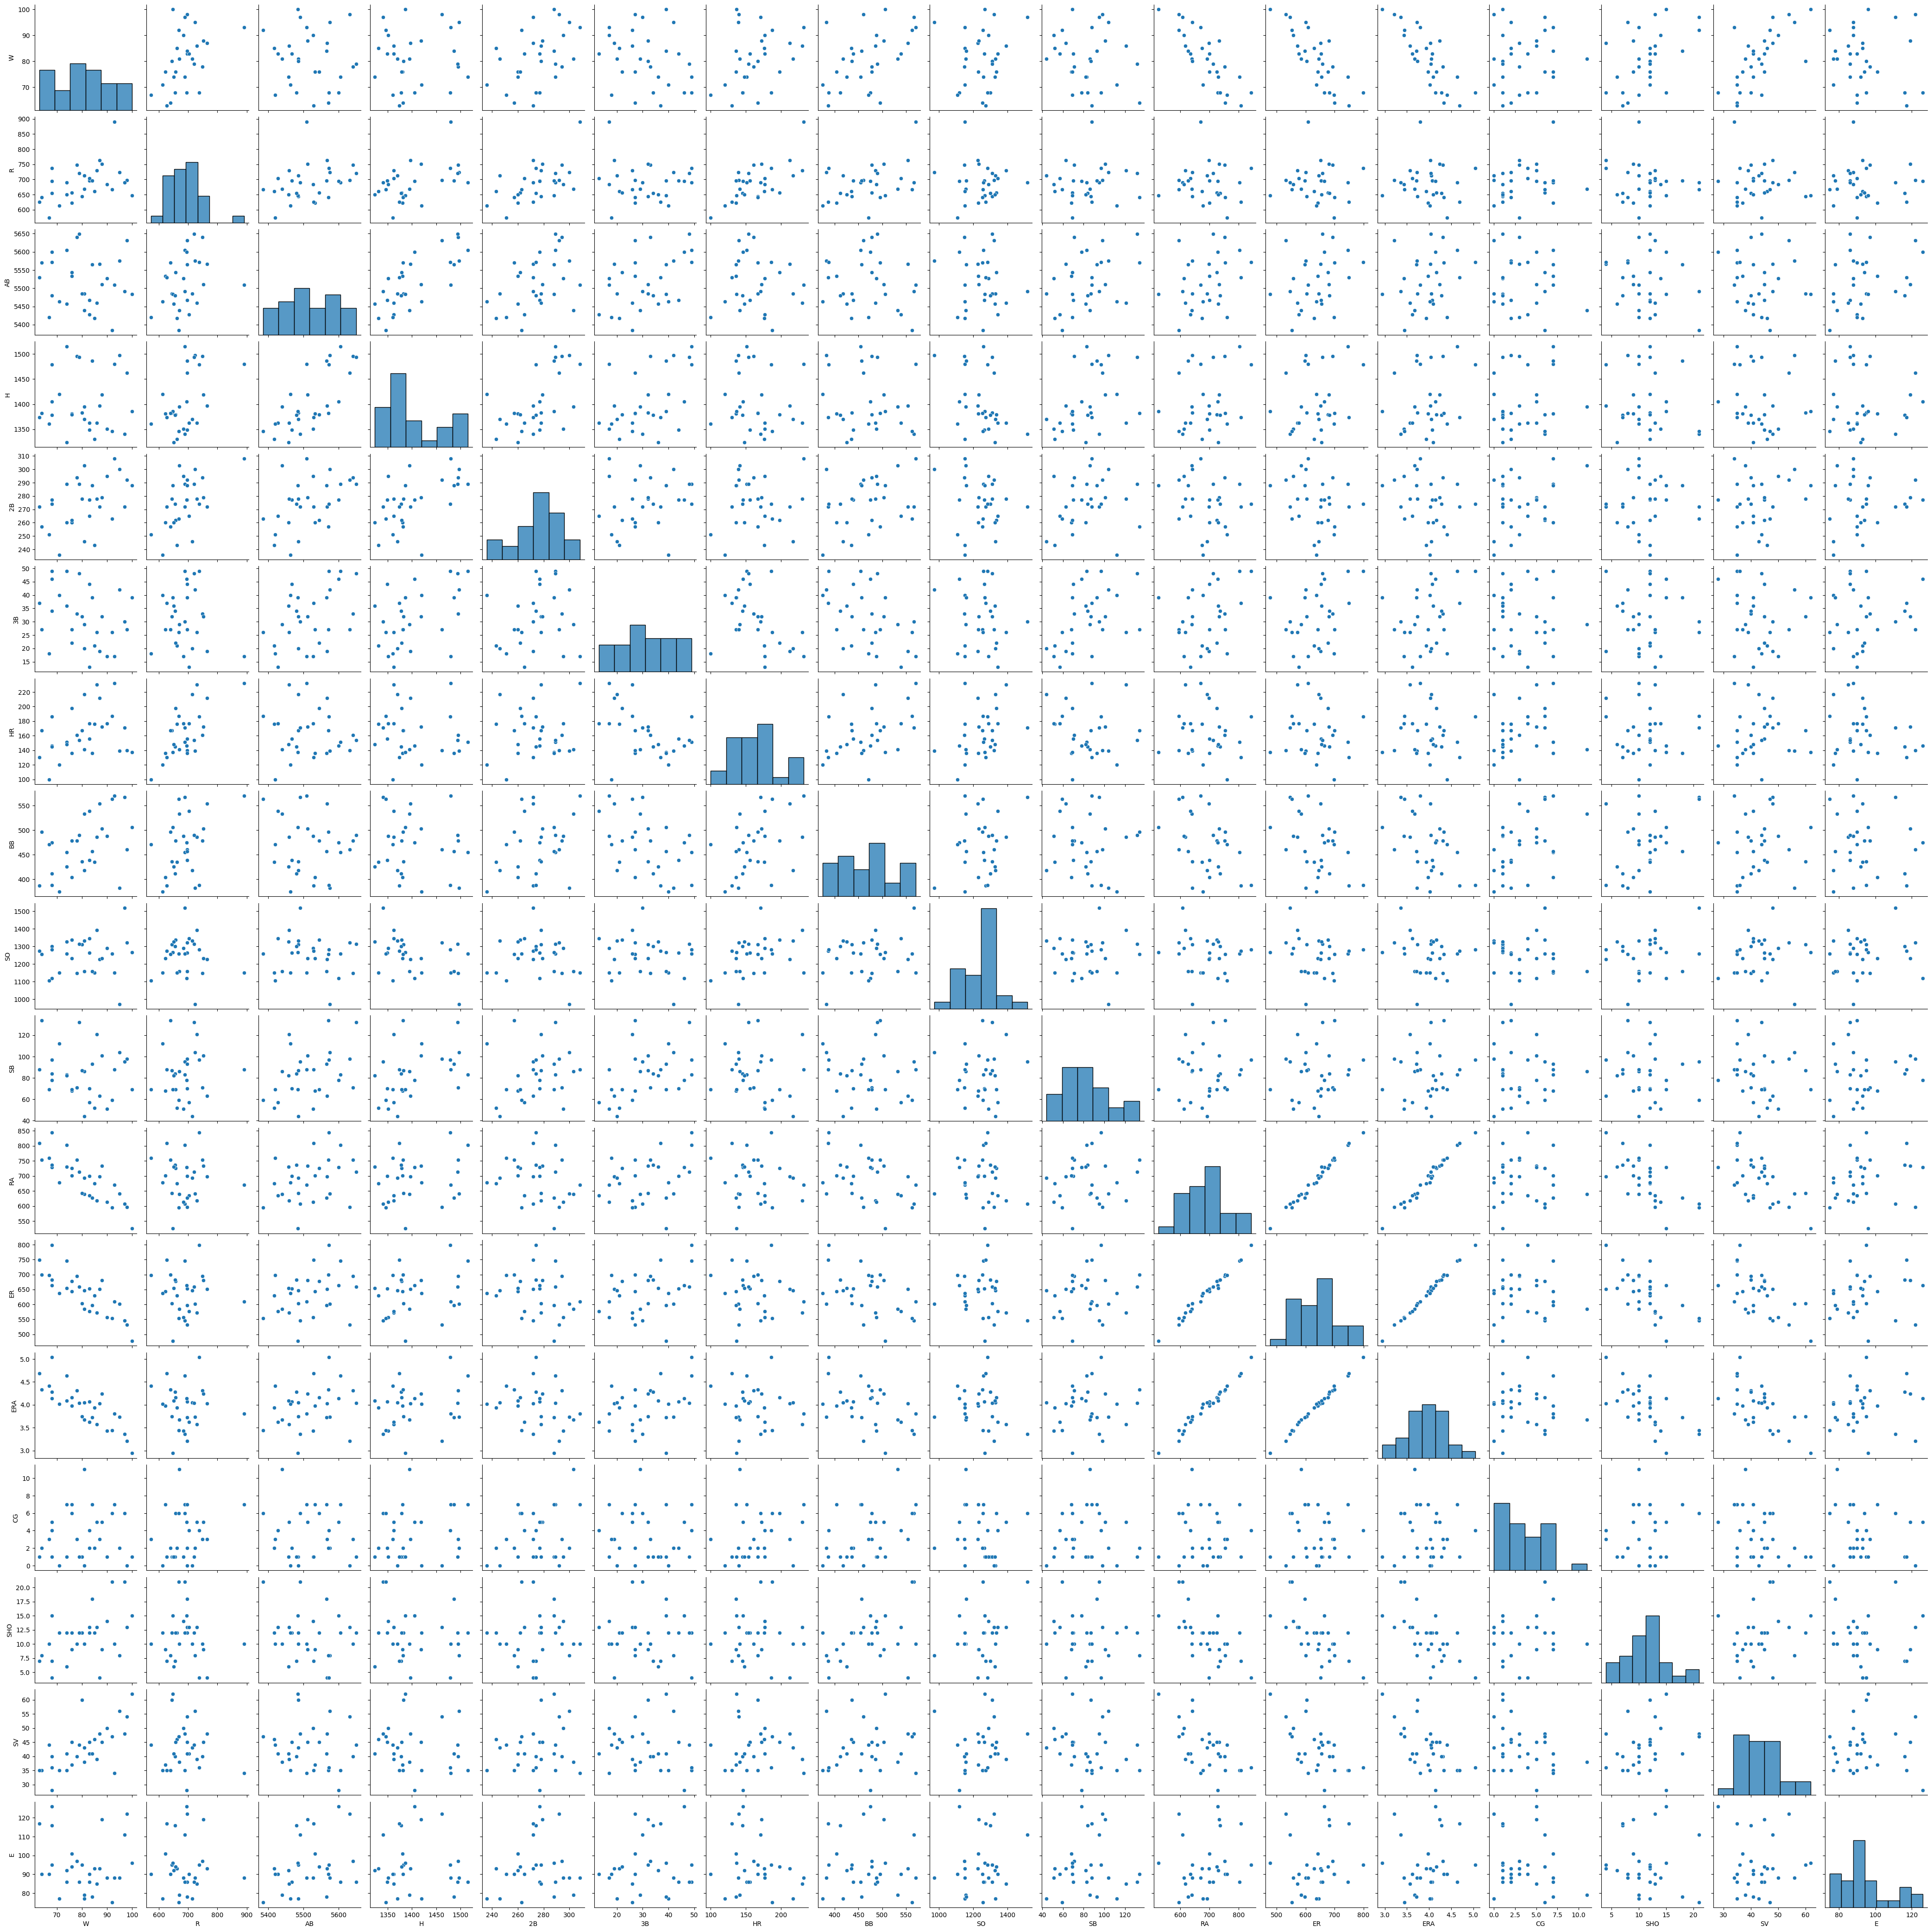

In [28]:
# Pairplot to understand the correlation between every numerical variable with each other

sns.pairplot(baseball_df)
plt.show()

<Axes: >

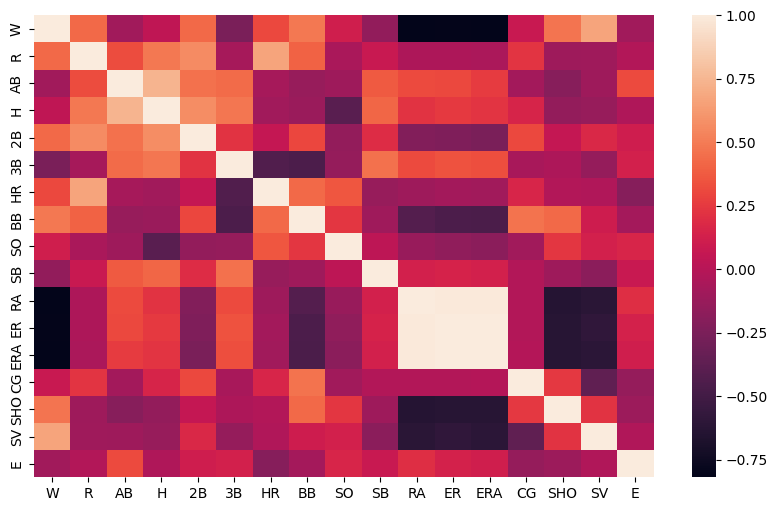

In [6]:
# Building the correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(baseball_df.corr())

In [7]:
# From the correlation plot above, it is clear that for predicting Number of wins (W), columns such as SO (Strikeout), CG (Complete Game) and H (Hit/Base Hit) have 0 correlation with W (Number of Wins)
# Hence dropping all these variables

baseball_df.drop(['SO', 'CG', 'H', ], axis=1, inplace=True)

In [8]:
# Extracting the independent and dependent variables

X = baseball_df.iloc[:, 1:].values
y = baseball_df.iloc[:, 0].values

In [9]:
# Dependent variable which is our target variable

y

array([ 95,  83,  81,  76,  74,  93,  87,  81,  80,  78,  88,  86,  85,
        76,  68, 100,  98,  97,  68,  64,  90,  83,  71,  67,  63,  92,
        84,  79,  74,  68])

In [14]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1111)

In [15]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
y_pred

array([83.93090244, 78.99270431, 81.75896538, 85.95925275, 88.81998813,
       97.10869675])

In [18]:
# Evaluation metrics for determining the model performance

print("Mean Squarerd Error :", mean_squared_error(y_test, y_pred))
print()
print("R Sqaure :", r2_score(y_test, y_pred))
print()
print("Model Coefficient :", regressor.coef_)
print()
print("Model Intercept :", regressor.intercept_)
print()
print("Explained Variance Score :", explained_variance_score(y_test, y_pred))
print()
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print()
print("Median Absolute Error :", median_absolute_error(y_test, y_pred))

Mean Squarerd Error : 21.254991517337295

R Sqaure : 0.7067153336051581

Model Coefficient : [ 1.11886584e-01 -3.09730312e-02 -4.31750784e-02  1.65105253e-02
 -4.80831629e-02 -6.41552527e-03 -3.55846005e-02  4.31386760e-02
  4.51097081e-01 -8.73003668e+01  4.21329969e-01  3.62102431e-01
 -6.69805171e-02]

Model Intercept : 214.7043767892935

Explained Variance Score : 0.7142356033923737

Mean Absolute Error : 4.365868206101072

Median Absolute Error : 3.9618033739182152


In [20]:
accuracy = regressor.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7067153336051581


# The model is performing quite well, with the above obtained evaluation metrics